In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
%cd C:\Users\praga\Downloads\PRML\Assign1
df=pd.read_csv('Dataset.csv',header = None)

C:\Users\praga\Downloads\PRML\Assign1


In [4]:
X=df.to_numpy()

In [5]:
X

array([[ 0.143  ,  0.98493],
       [-0.30467,  0.98562],
       [ 0.46625, -0.84003],
       ...,
       [ 6.1062 , -5.9864 ],
       [-7.4094 , -5.5205 ],
       [-0.12948, -8.8036 ]])

In [6]:
K=np.array([[0.0]*1000]*1000)#initialize K

In [7]:
def kernelfunc(a,b):#func for K
    d=2
    return (np.dot(a,b)+1)**d
#     (a[0]*b[0]+a[1]*b[1]+1)**d
    

    

In [8]:
for i in range(1000):#computing Kernel
    for j in range(i,1000):
        K[i,j]=K[j,i]=kernelfunc(X[i],X[j])
        

In [9]:
def Kcenter_simple(K): #centering Kernel Kc
    n=1000
    Krs=np.sum(K)
    Ki=np.array([0.0]*1000) 
    Kc=np.array([[0.0]*1000]*1000)
    for i1 in range(1000):
        Ki[i1]=0
        for j1 in range(1000):
            Ki[i1]+=K[i1,j1]
            
    for i in range(1000):
        for j in range(1000):
            Kc[i,j]=K[i,j]-Ki[i]/n-Ki[j]/n+Krs/n**2
    return Kc

In [10]:
Kc=Kcenter_simple(K)#centered Kernel

In [11]:
evals, evecs = np.linalg.eigh(Kc)#gives eigen in ascending and normalized vectors
idx = evals.argsort()[::-1] 
evecs = evecs[:,idx]/np.sqrt(abs(evals[idx]))
evals = evals[idx]
# evecs = evecs[:,idx]

#_________________


In [29]:
(evals[0]+evals[1])/np.sum(evals)# % var for first two eigens

0.6853024384520391

In [30]:
print(evals[4],evals[5])#0,1,2,3,4 are major evals

28626.436766886392 4.2145994460976103e-10


In [31]:
evals

array([ 5.60408032e+05,  4.97707378e+05,  4.23270529e+05,  3.39999467e+04,
        2.86264368e+04,  4.21459945e-10,  2.46024133e-10,  2.16971412e-10,
        1.94255391e-10,  1.83023767e-10,  1.36674664e-10,  1.26454750e-10,
        1.10744018e-10,  8.90828382e-11,  8.33489082e-11,  7.58234704e-11,
        7.35217129e-11,  6.27282269e-11,  5.33710513e-11,  4.80575574e-11,
        4.65175167e-11,  4.36819836e-11,  3.72095350e-11,  3.58575437e-11,
        3.39723632e-11,  3.30874942e-11,  3.14632082e-11,  2.80659481e-11,
        2.71996150e-11,  2.57185588e-11,  2.51387865e-11,  2.49688531e-11,
        2.33178258e-11,  2.32716191e-11,  2.22950177e-11,  2.18604958e-11,
        2.15733490e-11,  2.14678753e-11,  2.11129712e-11,  2.02369629e-11,
        1.98867921e-11,  1.98245269e-11,  1.96336641e-11,  1.92814429e-11,
        1.91568925e-11,  1.91337754e-11,  1.90174509e-11,  1.87996547e-11,
        1.84259042e-11,  1.83699030e-11,  1.82629295e-11,  1.78491166e-11,
        1.74490184e-11,  

In [19]:
project=np.array([[0.]*1000]*1000)#principal components
for i in range(1000):
    for j in range(1000):
        project[i,j]=np.dot(Kc[i],evecs[:,j])
        

In [21]:
np.dot(Kc[0],evecs[:,2])

14.334123640407372

In [22]:
project[:,0]#first PCs

array([-16.1974695 , -16.42149749, -16.72639328, -16.79018027,
       -16.86239885, -16.10787902, -17.12895806, -16.64717415,
       -17.08948548, -16.61531813, -17.00741398, -16.97123738,
       -16.32365051, -16.85396444, -16.49906915, -16.828256  ,
       -17.0850399 , -16.50817509, -17.05688237, -16.66745192,
       -17.18312847, -16.85655491, -16.58732792, -16.89584616,
       -16.34432722, -16.88041808, -16.13875056, -16.97442255,
       -16.79074296, -16.15593249, -17.1416029 , -16.20099588,
       -16.69551704, -16.36127914, -16.32993857, -16.99484871,
       -16.8555659 , -17.02927576, -17.05337345, -17.13606121,
       -16.50265029, -16.32021617, -16.9092994 , -16.31781494,
       -16.84916882, -16.7934565 , -16.16053312, -16.33993828,
       -16.9686998 , -16.13005656, -16.9944156 , -17.04462856,
       -16.96681808, -16.12115498, -16.7608789 , -17.14294004,
       -16.25016009, -16.31346254, -16.70992328, -16.82792865,
       -17.12170203, -17.11395526, -16.34205804, -16.88

In [23]:
project[:,1]#2nd PC

array([-1.54220240e+00, -2.00466136e+00, -1.90340289e+00, -5.73125138e-01,
       -5.92919280e-01, -1.32138453e+00, -1.54172720e+00, -1.94077645e+00,
       -8.39592638e-01, -2.02357524e+00, -7.09128038e-01, -6.91953600e-01,
       -8.03657718e-01, -6.12259772e-01, -6.53193906e-01, -5.90514975e-01,
       -8.93359382e-01, -1.78322710e+00, -1.64498436e+00, -1.93879250e+00,
       -1.19589984e+00, -6.20268844e-01, -6.49514963e-01, -1.91414437e+00,
       -8.07573254e-01, -1.87325067e+00, -1.46502750e+00, -1.79985995e+00,
       -1.91223000e+00, -1.35397810e+00, -1.29181094e+00, -1.83245958e+00,
       -5.95799220e-01, -6.67650240e-01, -1.67871591e+00, -1.78681626e+00,
       -1.85918332e+00, -1.69990047e+00, -1.67344951e+00, -1.10287934e+00,
       -1.98523628e+00, -7.96989258e-01, -6.26886366e-01, -1.84873944e+00,
       -1.92836024e+00, -6.19859590e-01, -1.70963064e+00, -1.74039161e+00,
       -1.80145635e+00, -1.30278887e+00, -1.76635394e+00, -7.59868545e-01,
       -6.99721054e-01, -

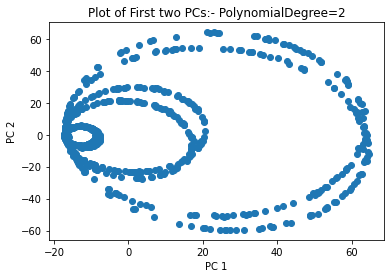

In [24]:
import matplotlib.pyplot as plt
plt.scatter(project[:,0],project[:,1])
plt.plot([0,])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Plot of First two PCs:- PolynomialDegree=2')
plt.show()